In [1]:
import h_transport_materials as htm
import matplotlib.pyplot as plt
import numpy as np

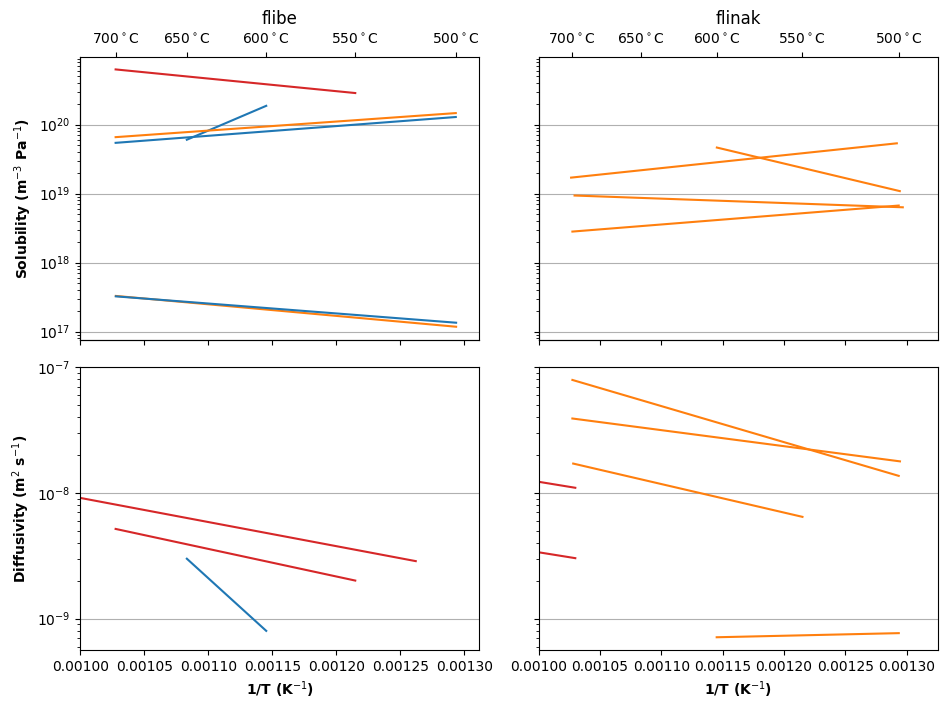

In [8]:
iso_to_colour = {"H": "tab:orange", "D": "tab:blue", "T": "tab:red"}

fig, axs = plt.subplots(
    nrows=2, ncols=2, sharex="col", sharey="row", figsize=(6.4 * 1.5, 4.8 * 1.5)
)

for col, mat in enumerate(["flibe", "flinak"]):
    plt.sca(axs[0][col])
    plt.title(mat)

    salt_solubilities = htm.solubilities.filter(material=mat)

    for prop in salt_solubilities:
        htm.plotting.plot(prop, color=iso_to_colour[prop.isotope])
    plt.yscale("log")

    plt.xlabel("")
    plt.grid(axis="y")

    plt.gca().spines.right.set_visible(False)
    plt.gca().spines.top.set_visible(False)

    plt.sca(axs[1][col])

    salt_diffusivities = htm.diffusivities.filter(material=mat)

    for prop in salt_diffusivities:
        htm.plotting.plot(prop, color=iso_to_colour[prop.isotope])

    plt.yscale("log")

    plt.grid(axis="y")

    plt.xlim(left=0.0010)

    ax_temperature = axs[0][col].twiny()
    ax_temperature.set_xlim(axs[0][col].get_xlim())

    temperature_ticks = np.arange(700, 450, step=-50)  # C
    ax_temperature.set_xticks([1 / (T + 273.15) for T in temperature_ticks])
    ax_temperature.set_xticklabels([f"{T:.0f}$^\circ$C" for T in temperature_ticks])
    ax_temperature.figure.canvas.draw()


for ax in [axs[1][0], axs[1][1]]:
    plt.sca(ax)
    plt.xlabel("1/T (K$^{-1}$)", weight="bold")

axs[0][0].set_ylabel("Solubility (m$^{-3}$ Pa$^{-1}$)", weight="bold")
axs[1][0].set_ylabel("Diffusivity (m$^{2}$ s$^{-1}$)", weight="bold")


# TODO make this work
# for ax in [*axs[0], *axs[1]]:
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
plt.tight_layout()


[None, None, None, None, None, None]

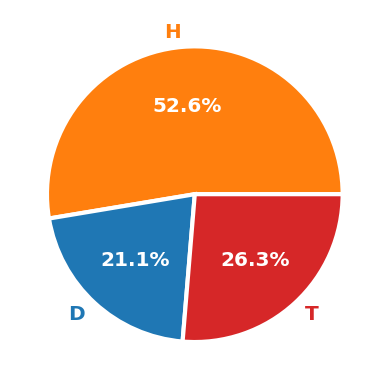

In [15]:

moltensalt_diffusivities = htm.diffusivities.filter(material=["flibe", "flinak"])
moltensalt_solubilities = htm.solubilities.filter(material=["flibe", "flinak"])

counters = {"H": 0, "D": 0, "T": 0}
for prop in moltensalt_diffusivities + moltensalt_solubilities:
    counters[prop.isotope] += 1

patches, texts, pcts = plt.pie(
    x=counters.values(),
    labels=counters.keys(),
    colors=[iso_to_colour[iso] for iso in counters.keys()],
    autopct="%.1f%%",
    wedgeprops={"linewidth": 3.0, "edgecolor": "white"},
    textprops={"size": "x-large"},
)
plt.setp(pcts, color="white", fontweight="bold")
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontweight=600)


In [10]:
refs = []
years = []
for prop in moltensalt_diffusivities + moltensalt_solubilities:
    entry = f"{prop.author.capitalize()} ({prop.year})"
    if entry not in refs:
        refs.append(entry)
        years.append(prop.year)

refs = [x for _, x in sorted(zip(years, refs))]

print(", ".join(refs[::-1]))


Lam (2021), Zeng (2019), Nakamura (2015), Zeng (2014), Calderoni (2008), Fukada (2006), Anderl (2004), Oishi (1989), Malinauskas (1974), Field (1967)
